<a href="https://colab.research.google.com/github/haji8-de/AIFFEL_quest_rs/blob/main/Exploration/Ex01/camera_filter_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 학습 소스
* 학습 소스가 상단에 있습니다.
이 블럭을 전부 감추기 한 뒤
실제 코드를 확인하세요.

단, dat 로드등 기본 소스는 학습 소스 상단에 위치하기때문에
직접 run 하실때는 전체 소스를 한번 run 하셔야합니다.

In [1]:
!echo $HOME
!pwd
!ls -a $HOME

/root
/content
.   .bashrc  .config   .julia	 .keras		.local	.profile    .wget-hsts
..  .cache   .ipython  .jupyter  .launchpadlib	.npm	.tmux.conf


In [2]:
!wget https://cdn-icons-png.flaticon.com/512/24/24674.png
!mv 24674.png ~/work/camera_sticker/images/cat_whiskers.png


--2026-01-16 07:39:53--  https://cdn-icons-png.flaticon.com/512/24/24674.png
Resolving cdn-icons-png.flaticon.com (cdn-icons-png.flaticon.com)... 2.18.121.138, 2.18.121.140, 2a02:26f0:1180:3::212:798a, ...
Connecting to cdn-icons-png.flaticon.com (cdn-icons-png.flaticon.com)|2.18.121.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5324 (5.2K) [image/png]
Saving to: ‘24674.png’

24674.png           100%[===================>]   5.20K  --.-KB/s    in 0s      

2026-01-16 07:39:53 (74.3 MB/s) - ‘24674.png’ saved [5324/5324]

mv: cannot move '24674.png' to '/root/work/camera_sticker/images/cat_whiskers.png': No such file or directory


In [3]:
!mkdir -p ~/work/camera_sticker/models
!mkdir -p ~/work/camera_sticker/images
!ls -ld ~/work/camera_sticker/models
!ls -ld ~/work/camera_sticker/images

drwxr-xr-x 2 root root 4096 Jan 16 07:39 /root/work/camera_sticker/models
drwxr-xr-x 2 root root 4096 Jan 16 07:39 /root/work/camera_sticker/images


In [4]:
!wget https://d3s0tskafalll9.cloudfront.net/media/images/E-8-6.max-800x600_rkMHa4K.png # 기본 제공 이미지입니다. 여러분만의 이미지로 수정해보세요!
!mv E-8-6.max-800x600_rkMHa4K.png ~/work/camera_sticker/images/image.png
!ls ~/work/camera_sticker/images

--2026-01-16 07:39:53--  https://d3s0tskafalll9.cloudfront.net/media/images/E-8-6.max-800x600_rkMHa4K.png
Resolving d3s0tskafalll9.cloudfront.net (d3s0tskafalll9.cloudfront.net)... 13.227.219.22, 13.227.219.35, 13.227.219.114, ...
Connecting to d3s0tskafalll9.cloudfront.net (d3s0tskafalll9.cloudfront.net)|13.227.219.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 363552 (355K) [image/png]
Saving to: ‘E-8-6.max-800x600_rkMHa4K.png’

E-8-6.max-800x600_r 100%[===================>] 355.03K   501KB/s    in 0.7s    

2026-01-16 07:39:55 (501 KB/s) - ‘E-8-6.max-800x600_rkMHa4K.png’ saved [363552/363552]

image.png


In [5]:
!wget https://d3s0tskafalll9.cloudfront.net/media/original_images/E-8-3.png
!wget https://d3s0tskafalll9.cloudfront.net/media/original_images/E-8-4.png
!mv E-8-3.png ~/work/camera_sticker/images/king.png
!mv E-8-4.png ~/work/camera_sticker/images/hero.png

--2026-01-16 07:39:55--  https://d3s0tskafalll9.cloudfront.net/media/original_images/E-8-3.png
Resolving d3s0tskafalll9.cloudfront.net (d3s0tskafalll9.cloudfront.net)... 13.227.219.22, 13.227.219.35, 13.227.219.114, ...
Connecting to d3s0tskafalll9.cloudfront.net (d3s0tskafalll9.cloudfront.net)|13.227.219.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13511 (13K) [image/png]
Saving to: ‘E-8-3.png’

E-8-3.png           100%[===================>]  13.19K  --.-KB/s    in 0s      

2026-01-16 07:39:56 (55.5 MB/s) - ‘E-8-3.png’ saved [13511/13511]

--2026-01-16 07:39:56--  https://d3s0tskafalll9.cloudfront.net/media/original_images/E-8-4.png
Resolving d3s0tskafalll9.cloudfront.net (d3s0tskafalll9.cloudfront.net)... 13.227.219.22, 13.227.219.35, 13.227.219.114, ...
Connecting to d3s0tskafalll9.cloudfront.net (d3s0tskafalll9.cloudfront.net)|13.227.219.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42963 (42K) [image/png]
Saving to: ‘

In [6]:
!pip install cmake
!pip install opencv-python
!conda install -y dlib

/bin/bash: line 1: conda: command not found


In [7]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리
print("🌫🛸")

🌫🛸


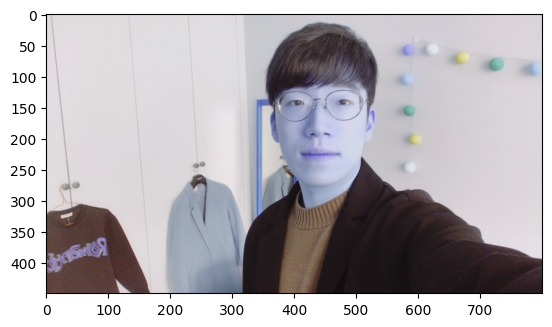

In [8]:
home_dir = os.getenv('HOME')
my_image_path = os.path.join(home_dir, 'work/camera_sticker/images/image.png') # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

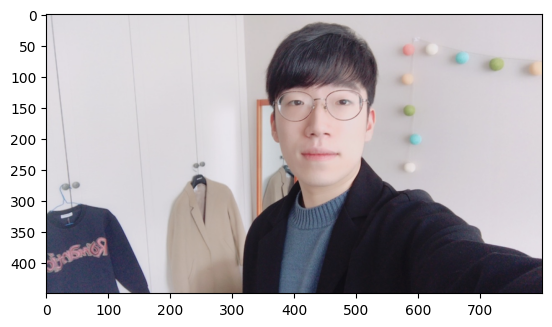

In [9]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

In [10]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
print("🌫🛸")

🌫🛸


In [11]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(345, 98) (531, 284)]]


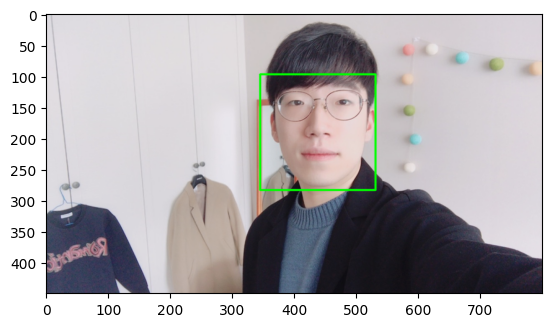

In [12]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [13]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!mv shape_predictor_68_face_landmarks.dat.bz2 ~/work/camera_sticker/models
!cd ~/work/camera_sticker && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2

--2026-01-16 07:40:10--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2026-01-16 07:40:11--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  17.7MB/s    in 3.5s    

2026-01-16 07:40:15 (17.7 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [14]:
model_path = os.path.join(home_dir, 'work/camera_sticker/models/shape_predictor_68_face_landmarks.dat')
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄
print("🌫🛸")

🌫🛸


In [15]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


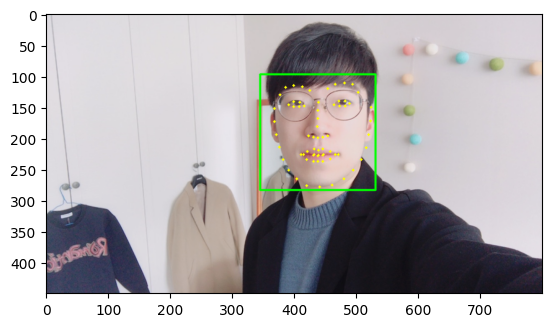

In [16]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

In [17]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
# → [[(368, 153), (368, 174), (371, 195), (376, 215), (382, 235), (391, 252), (404, 266), (420, 277), (441, 279), (461, 276), (480, 266), (495, 252), (508, 235), (516, 216), (520, 195), (523, 173), (524, 151), (377, 131), (386, 119), (399, 116), (413, 118), (425, 124), (454, 121), (466, 114), (481, 112), (494, 114), (503, 127), (439, 143), (438, 156), (438, 169), (437, 182), (423, 197), (431, 199), (438, 200), (446, 199), (454, 197), (391, 147), (399, 142), (409, 143), (416, 149), (408, 150), (399, 150), (464, 147), (472, 141), (482, 141), (489, 145), (482, 149), (473, 149), (411, 227), (421, 222), (432, 218), (439, 220), (446, 218), (458, 222), (471, 227), (458, 234), (446, 238), (438, 238), (431, 238), (420, 235), (415, 227), (432, 227), (439, 228), (447, 227), (466, 227), (446, 228), (438, 229), (431, 228)]]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(437, 182)
(x,y) : (437,89)
(w,h) : (187,187)


In [18]:
sticker_path = os.path.join(home_dir, 'work/camera_sticker/images/king.png') # 왕관 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인

(187, 187, 3)


In [19]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
# x는 이미지에서 코 부위의 x값 = 437
# y는 이미지에서 코 부위의 y값 = 89
# w는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 187
# h는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 187
refined_x = x - w // 2 # 437 - (187//2) = 437-93 = 344
refined_y = y - h # 89-187 = -98
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 왕관 이미지가 시작됨
print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남
# 우리는 현재 이마 자리에 왕관을 두고 싶은건데, 이마위치 - 왕관 높이를 했더니 이미지의 범위를 초과하여 음수가 나오는 것
# opencv는 ndarray데이터를 사용하는데, ndarray는 음수인덱스에 접근 불가하므로 스티커 이미지를 잘라 줘야 한다.

(x,y) : (344,-98)


In [20]:
# 왕관 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.
# 음수값 만큼 왕관 이미지(혹은 추후 적용할 스티커 이미지)를 자른다.
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (344,0)


In [21]:
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지 입니다.
# 예제에서는 (344,0) 부터 (344+187, 0+89) 범위의 이미지를 의미합니다.
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_show[0:0+89, 344:344+187]
# img_show[0:89, 344:531]
# 즉, x좌표는 344~531 / y좌표는 0~89가 됨
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# 왕관 이미지에서 사용할 부분은 0이 아닌 색이 있는 부분을 사용합니다.
# 왕관 이미지에서 0이 나오는 부분은 흰색이라는 뜻, 즉 이미지가 없다는 소리임.
# 현재 왕관 이미지에서는 왕관과 받침대 밑의 ------ 부분이 됨
# 그렇기 때문에 0인 부분(이미지가 없는 부분)은 제외하고 적용
# sticker_area는 원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지입니다.
# 즉, 왕관 이미지에서 왕관 이미지가 없는 부분(왕관과 받침대 밑의 ------ 부분)은 원본 이미지에서 미리 잘라놓은 sticker_area(스티커 적용할 부분 만큼 원본 이미지에서 자른 이미지)를 적용하고,
# 나머지 부분은 스티커로 채워주면 됨
# np.where는 조건에 해당하는 인덱스만 찾아서 값을 적용하는 방법이다.
# 아래 코드에서는 img_sticker가 0일 경우(왕관 이미지에서 왕관 부분 제외한 나머지 이미지)에는 sticker_area(원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지)를 적용하고,
# 나머지 부분은 img_sticker(왕관 이미지)를 적용한다.
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

슝~


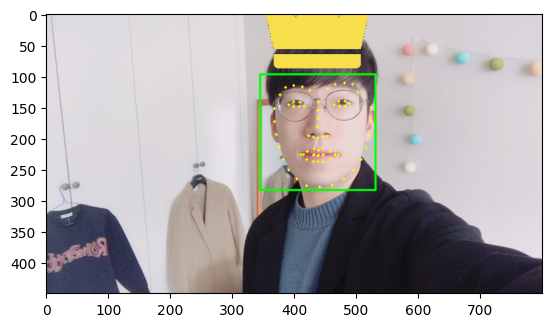

In [22]:
# 왕관 이미지를 적용한 이미지를 보여준다.
# 얼굴 영역(7-3)과 랜드마크(7-4)를 미리 적용해놓은 img_show에 왕관 이미지를 덧붙인 이미지가 나오게 된다.)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

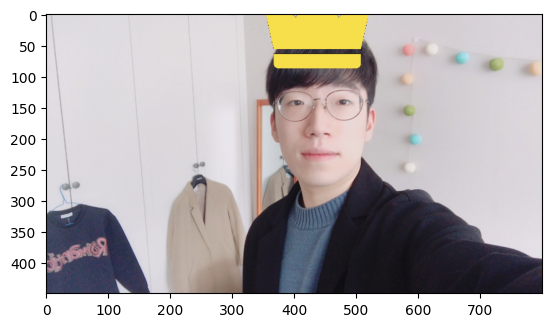

In [23]:
# 위에서 설명했으므로 생략
# 왕관 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다.
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

# 고양이 수염 카메라 필터 만들기

In [184]:
home_dir = os.getenv('HOME')
my_image_path = os.path.join(home_dir, 'work/camera_sticker/images/haji_01.jpg') # 본인 이미지가 있는 경로를 가지고 온다.


## 기본 작업


In [185]:
!pip install cmake opencv-python
!conda install -y dlib

/bin/bash: line 1: conda: command not found


In [186]:
import cv2
import dlib

print(cv2.__version__)
print(dlib.__version__)

4.12.0
19.24.6


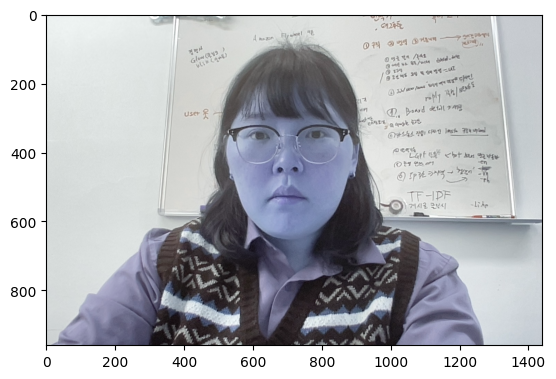

In [187]:
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

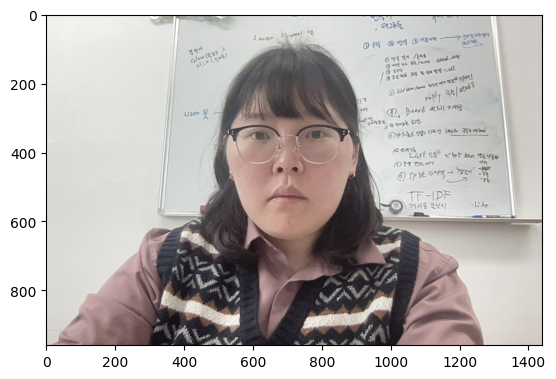

In [188]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

In [189]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
print("🌫🛸")

🌫🛸


In [190]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(504, 247) (889, 632)]]


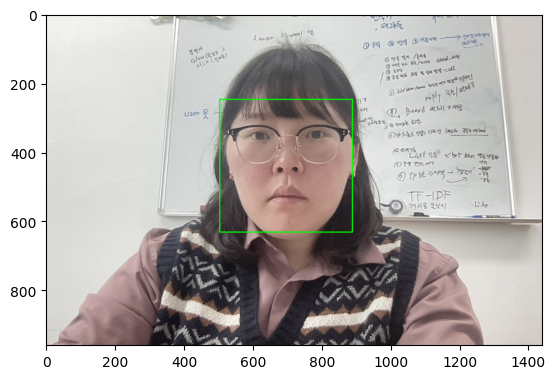

In [191]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [192]:
model_path = os.path.join(home_dir, 'work/camera_sticker/models/shape_predictor_68_face_landmarks.dat')
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄
print("🌫🛸")

🌫🛸


In [193]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


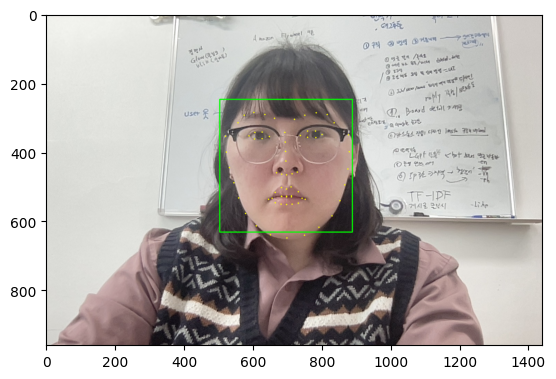

In [194]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

In [195]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
# → [[(368, 153), (368, 174), (371, 195), (376, 215), (382, 235), (391, 252), (404, 266), (420, 277), (441, 279), (461, 276), (480, 266), (495, 252), (508, 235), (516, 216), (520, 195), (523, 173), (524, 151), (377, 131), (386, 119), (399, 116), (413, 118), (425, 124), (454, 121), (466, 114), (481, 112), (494, 114), (503, 127), (439, 143), (438, 156), (438, 169), (437, 182), (423, 197), (431, 199), (438, 200), (446, 199), (454, 197), (391, 147), (399, 142), (409, 143), (416, 149), (408, 150), (399, 150), (464, 147), (472, 141), (482, 141), (489, 145), (482, 149), (473, 149), (411, 227), (421, 222), (432, 218), (439, 220), (446, 218), (458, 222), (471, 227), (458, 234), (446, 238), (438, 238), (431, 238), (420, 235), (415, 227), (432, 227), (439, 228), (447, 227), (466, 227), (446, 228), (438, 229), (431, 228)]]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33]) # 코의 index는 30 입니다
    x = landmark[33][0] # 이미지에서 코 부위의 x값
    y = landmark[33][1] - dlib_rect.height()//2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(698, 466)
(x,y) : (698,273)
(w,h) : (386,386)


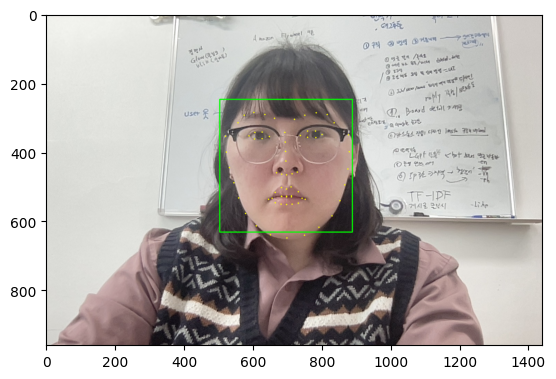

In [196]:
# 왕관 이미지를 적용한 이미지를 보여준다.
# 얼굴 영역(7-3)과 랜드마크(7-4)를 미리 적용해놓은 img_show에 왕관 이미지를 덧붙인 이미지가 나오게 된다.)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## 안경을 썼을때와 쓰지 않았을때

* 두가지 전부 잘 이미지를 분석해주는 것으로 보인다
눈썹의 위치, 눈의 위치 등을 정확히 잡아 주고 있으며
과제의 중요위치인 콧잔등도 잘 확인 할 수 있었다.

## 각도에 따른 이미지 검출

* 다양한 각도 그리고 크롭을 통해 인식율을 확인하였는데,
다양한 각도에서 그리고 머리가 조금 나오지 않은 상태에서도
모든 경우에 잘 얼굴이 검출되었다.

## 거리에 따른 이미지 검출

* 거리에 따라서도 동일하게 얼굴이 잘 검출 되었다.
이에 따라 스티커 사진의 사이즈를 조절해 보았다.


## 사람이 여러명 있을때 이미지 검출

* 이미지 내의 사람과 이목구비는 잘 검출되었으나,
이미지 필터가 제대로 동작하지 않고
의미없는 위치에 뜨고 있었다.



## 고양이 수염 필터 만들어 보기
* 이미 얼굴 영역은 추출되었고, 데이터가 존재
```
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))

    print (landmark[33]) # 코의 index는 30 입니다
    x = landmark[33][0] # 이미지에서 코 부위의 x값
# 코 끝의 index는 33 입니다.
```

아래 두 이미지는 같은 포지션의 이미지로, 립과 코의 구분이 명확하지 않은 기존 그림을 서포트 하기위해 포지션 이미지 01을 추가했습니다.


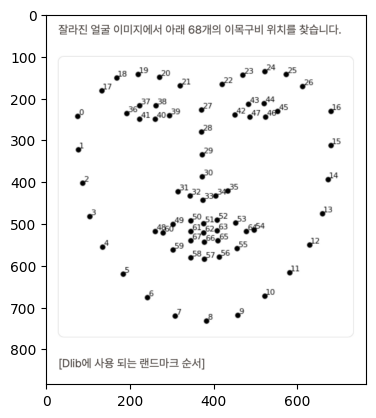

In [161]:
face_position_path = os.path.join(home_dir, '/content/sample_data/camera_stiker/face_position01.png') # 왕관 이미지의 경로
face_position = cv2.imread(face_position_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환

plt.imshow(face_position)
plt.show()

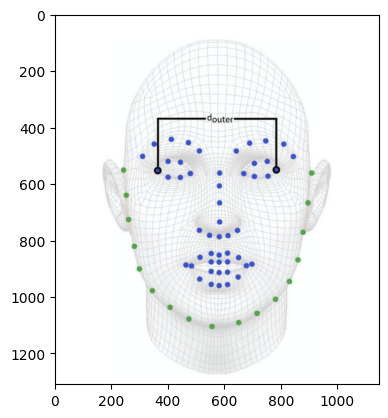

In [162]:
face_position_path = os.path.join(home_dir, '/content/sample_data/camera_stiker/face_position02.png') # 왕관 이미지의 경로
face_position = cv2.imread(face_position_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환

plt.imshow(face_position)
plt.show()

## 고양이 수염 크기 조정

> 고양이 수염을 0.5 사이즈로 조정
```
factor = 1.5
if w < 200 :
  factor = 0.5
elif w  <350 :
  factor = 1.0
  ```


In [197]:
sticker_path = os.path.join(home_dir, 'work/camera_sticker/images/cat_whiskers.png') # 왕관 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
# img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
# print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인

# img_sticker_rgb = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
# plt.imshow(img_sticker_rgb)
# plt.show()

(579, 579, 3)


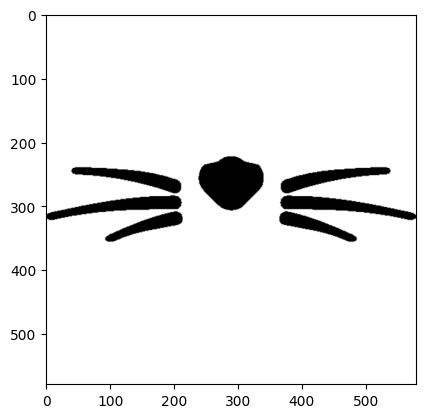

In [198]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    # Get the nose tip coordinates (index 33 for dlib's 68-point model)
    # These are the actual (x, y) coordinates on the face, not adjusted yet
    nose_x = landmark[33][0]
    nose_y = landmark[33][1]

factor = 1.5
if w < 200 :
  factor = 0.5
elif w  <350 :
  factor = 1.0

# 이 값을 조절하여 스티커의 크기를 얼굴 크기에 비례하게 바꿀 수 있습니다.
sticker_scale_factor = factor # 스티커 크기 조절을 위한 배율 (1.0은 얼굴 너비와 동일)

# 스티커의 새로운 너비와 높이를 계산
new_sticker_width = int(w * sticker_scale_factor)
new_sticker_height = int(h * sticker_scale_factor)

# 스티커 이미지 조정
img_sticker = cv2.resize(img_sticker, (new_sticker_width, new_sticker_height))
print (img_sticker.shape) # 사이즈를 조정한 고양이 수염 이미지의 차원 확인

plt.imshow(cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

## TEST 결과


1 466 579 579
슝~


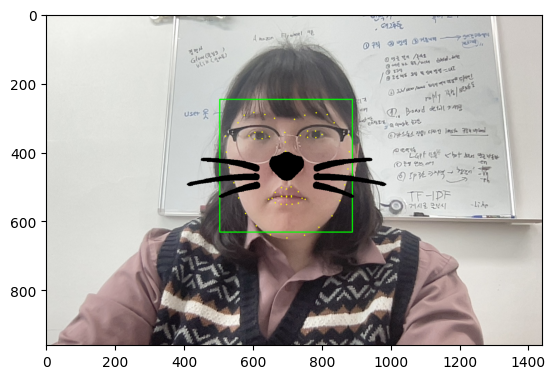

In [199]:
# 스티거의 사이즈
sticker_width = img_sticker.shape[1]
sticker_height = img_sticker.shape[0]
# 재계산한 x,y 값
refined_x = nose_x - sticker_width // 2
refined_y = nose_y - sticker_height // 2  # 조금 미세한 조정을 위해 4분할한 이미지 크기만큼 빼줌
print("1", nose_y, sticker_height, sticker_height)

# 이미지 임시 저장
temp_img_sticker = img_sticker.copy()

#음수 값 소멸시키기
if refined_x < 0:
    temp_img_sticker = temp_img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    temp_img_sticker = temp_img_sticker[-refined_y:, :]
    refined_y = 0

# 임시 스티커 이미지 사이즈로부터 현재 이미지 높이 너비 가져오기
current_sticker_height = temp_img_sticker.shape[0]
current_sticker_width = temp_img_sticker.shape[1]

# 원본 이미지의 shape
img_height, img_width, _ = img_show.shape

# 가로와 세로 길이에 따라 이미지 사이즈 자르기
if refined_x + current_sticker_width > img_width:
    current_sticker_width = img_width - refined_x
    temp_img_sticker = temp_img_sticker[:, :current_sticker_width]

if refined_y + current_sticker_height > img_height:
    current_sticker_height = img_height - refined_y
    temp_img_sticker = temp_img_sticker[:current_sticker_height, :]

# 이미지 원본에서 스티커 위치 정하기
sticker_area = img_show[refined_y : refined_y + current_sticker_height,
                        refined_x : refined_x + current_sticker_width]

# 이미지 show
    #np.where : 조건에 만족하는 인덱스를 찾아 적용하기
img_show[refined_y : refined_y + current_sticker_height,
          refined_x : refined_x + current_sticker_width] = \
    np.where(temp_img_sticker == 0, temp_img_sticker, sticker_area).astype(np.uint8)

print("슝~")

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## 결과 확인


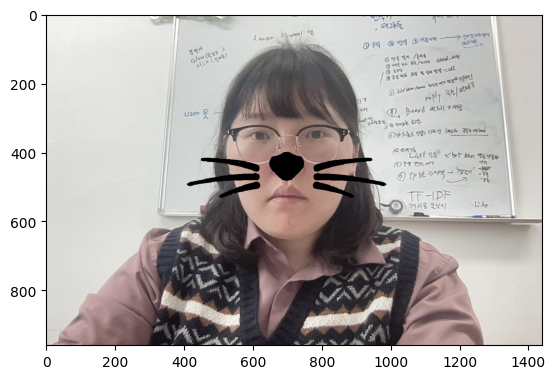

In [200]:
# 위에서 설명했으므로 생략
# 왕관 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다.
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

## 문제점
1.   얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
      * 얼굴 각도에 따라 자연스럽게 휘어져야 한다.
2.   멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
      * 적당한 먼거리는 인식하였다. 사람 얼굴 검출기의 성능이 정자세의 사람을 기준으로 하기 때문인거 같다.
3.   실행 속도가 중요할까요?
      * 실 서비스 용이라면 비디오에 필터를 달 수도 있기 때문에 실시간으로 필터가 달려야 한다.
4.   스티커앱을 만들 때 정확도가 얼마나 중요할까요?
      * 필터가 잠시 벗겨지면 우스꽝 스러울 수 있기 때문에, 그리고 얼굴이 아닌 다른 도자기 같은것을 인식하면 도자기에 코양이 수염을 달 수도 있기 때문에 정확도가 중요하다.





In [ ]:
my_image_path = os.path.join(home_dir, 'work/camera_sticker/images/haji_01.jpg') # 본인 이미지가 있는 경로를 가지고 온다.

my_image_path = os.path.join(home_dir, 'work/camera_sticker/images/haji_05.jpg') # 본인 이미지가 있는 경로를 가지고 온다.


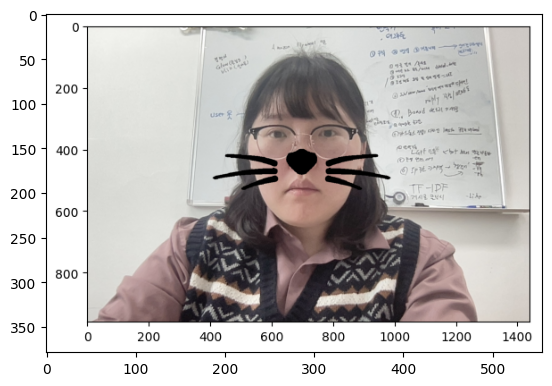

In [204]:
result_path = os.path.join(home_dir, '/content/sample_data/camera_stiker/Unknown-9.png') # 왕관 이미지의 경로
result = cv2.imread(result_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

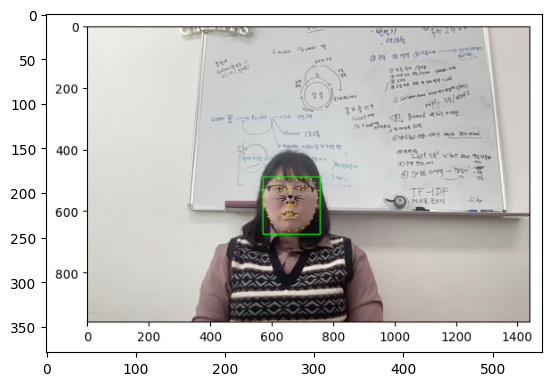

In [205]:
result_path = os.path.join(home_dir, '/content/sample_data/camera_stiker/Unknown-5.png') # 왕관 이미지의 경로
result = cv2.imread(result_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()